<a href="https://colab.research.google.com/github/zacknn/MachineLearning/blob/main/models/neural_networks/neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist

In [ ]:
from sklearn.model_selection import train_test_split

# Load the MNIST dataset (already imported from keras.datasets)
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Split the full training data into training and validation sets
# We'll use 10% for validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_valid.shape}")
print(f"Validation labels shape: {y_valid.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (54000, 28, 28)
Training labels shape: (54000,)
Validation data shape: (6000, 28, 28)
Validation labels shape: (6000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


Here's what each part means:

*   `X_train`: The images used for training your neural network.
*   `y_train`: The labels (digits 0-9) corresponding to the training images.
*   `X_valid`: The images used for validating your model during training (to tune hyperparameters and prevent overfitting).
*   `y_valid`: The labels for the validation images.
*   `X_test`: The images reserved for evaluating the final performance of your trained model on completely unseen data.
*   `y_test`: The labels for the test images.

`train_test_split` is a convenient function from `sklearn` that shuffles and splits your data for you. I've used `random_state=42` to ensure the split is reproducible.

### Data Preprocessing: Normalization and Reshaping

We need to normalize the pixel values of the images from the original range of 0-255 to 0-1. This helps in faster convergence during training. Additionally, for a simple feedforward neural network, we'll flatten each 28x28 image into a 1D array (784 features).

In [ ]:
# Normalize the image data (scale pixel values to 0-1)
X_train_processed = X_train.astype('float32') / 255.0
X_valid_processed = X_valid.astype('float32') / 255.0
X_test_processed = X_test.astype('float32') / 255.0

# Reshape the data for a dense neural network (flatten 28x28 images to 784-dimensional vectors)
X_train_processed = X_train_processed.reshape(-1, 28 * 28)
X_valid_processed = X_valid_processed.reshape(-1, 28 * 28)
X_test_processed = X_test_processed.reshape(-1, 28 * 28)

print(f"Processed Training data shape: {X_train_processed.shape}")
print(f"Processed Validation data shape: {X_valid_processed.shape}")
print(f"Processed Test data shape: {X_test_processed.shape}")

Processed Training data shape: (54000, 784)
Processed Validation data shape: (6000, 784)
Processed Test data shape: (10000, 784)


In [ ]:
def relu(z):
  return np.maximum(0, z)

def relu_deriv(z):
  return (z > 0).astype(float)

def softmax(z):
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
class SimpleNN:
  def __init__(self , input_size , hidden_size , output_size , learning_rate= 0.01):
    self.lr = learning_rate
    #initial weight and biases
    self.W1 = np.random.randn(input_size , hidden_size) * 0.01
    self.b1 = np.zeros((1, hidden_size))
    self.W2 = np.random.randn(hidden_size , output_size) * 0.01
    self.b2 = np.zeros((1, output_size))
  def forward(self, X):
    # hidden layer
    self.Z1 = np.dot(X , self.W1) + self.b1
    self.A1 = relu(self.Z1)
    # output layer
    self.Z2 = np.dot(self.A1 , self.W2) + self.b2
    self.A2 = softmax(self.Z2)
    return self.A2
  def compute_loss(self, y_true, y_pred):
    # Cross-entropy loss
    m = y_true.shape[0]
    log_probs = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])
    return np.sum(log_probs) / m
  def backward(self, X, y_true):
    m = X.shape[0]
    # Output layer gradients
    dZ2 = self.A2 - y_true
    dW2 = np.dot(self.A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    # Hidden layer gradients
    dA1 = np.dot(dZ2, self.W2.T)
    dZ1 = dA1 * relu_deriv(self.Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    # update weight
    self.W1 -= self.lr * dW1
    self.b1 -= self.lr * db1
    self.W2 -= self.lr * dW2
    self.b2 -= self.lr * db2
  def train(self, X, Y, epochs=10, batch_size=64):
    for epoch in range(epochs):
      for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size]
        Y_batch = Y[i:i+batch_size]
        Y_pred = self.forward(X_batch)
        self.backward(X_batch, Y_batch)
      # compute the full lose
      Y_pred_full = self.forward(X)
      loss = self.compute_loss(Y_pred_full, Y)
      print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
  def predict(self, X):
    Y_pred = self.forward(X)
    return np.argmax(Y_pred, axis=1)

In [ ]:
from keras.utils import to_categorical

# Hyperparameters
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01  # Reduced learning rate
epochs = 20
batch_size = 64

# Convert integer labels to one-hot encoded labels
Y_train_one_hot = to_categorical(y_train, num_classes=output_size)
Y_valid_one_hot = to_categorical(y_valid, num_classes=output_size)
Y_test_one_hot = to_categorical(y_test, num_classes=output_size)

# Create and train model
model = SimpleNN(input_size, hidden_size, output_size, learning_rate)
model.train(X_train_processed, Y_train_one_hot, epochs=epochs, batch_size=batch_size)

# Evaluate on test set
predictions = model.predict(X_test_processed)
accuracy = np.mean(predictions == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

/tmp/ipython-input-1122857838.py:20: RuntimeWarning: divide by zero encountered in log
  log_probs = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])


Epoch 1/20, Loss: inf
Epoch 2/20, Loss: inf
Epoch 3/20, Loss: inf
Epoch 4/20, Loss: inf
Epoch 5/20, Loss: inf
Epoch 6/20, Loss: inf
Epoch 7/20, Loss: inf
Epoch 8/20, Loss: inf
Epoch 9/20, Loss: inf
Epoch 10/20, Loss: inf
Epoch 11/20, Loss: inf
Epoch 12/20, Loss: inf
Epoch 13/20, Loss: inf
Epoch 14/20, Loss: inf
Epoch 15/20, Loss: inf
Epoch 16/20, Loss: inf
Epoch 17/20, Loss: inf
Epoch 18/20, Loss: inf
Epoch 19/20, Loss: inf
Epoch 20/20, Loss: inf
Test Accuracy: 94.07%


so to be onest i dont know why i get the Loss inf . if someone know please help

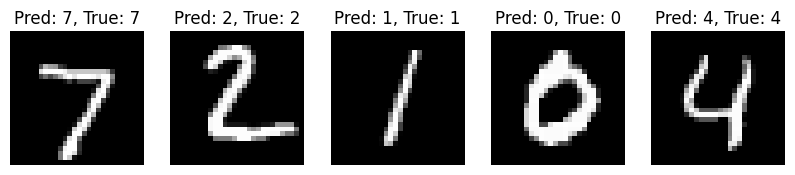

In [ ]:
import matplotlib.pyplot as plt

# Plot some test images with predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    img = X_test[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.show()

it still work :)